In [ ]:
import os
import requests
import numpy as np
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

api_key = 'INSERT_API_KEY_HERE'
fred = Fred(api_key)

In [ ]:
sp500 = fred.get_series('SP500')

<AxesSubplot:title={'center':'S&P500'}>

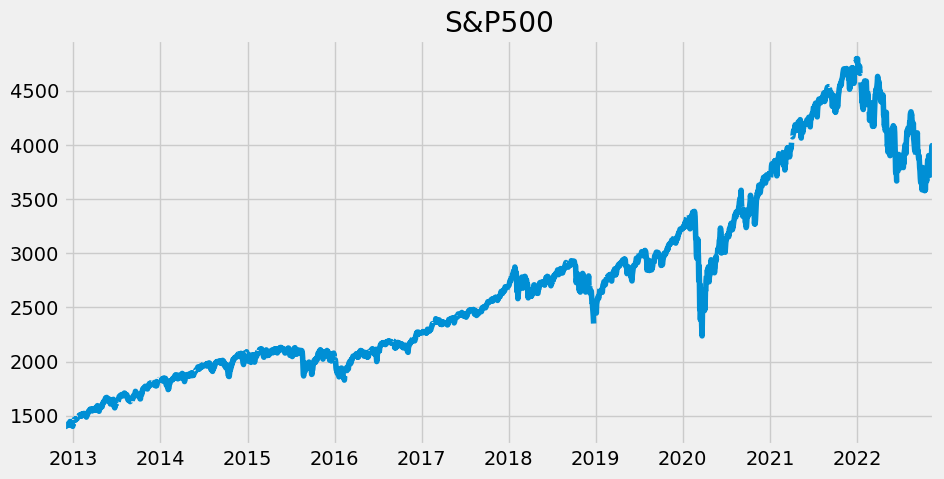

In [ ]:
sp500.plot(figsize=(10,5), title='S&P500')

In [ ]:
liab_and_capt = fred.get_series('WTREGEN')

<AxesSubplot:title={'center':'WTREGEN'}>

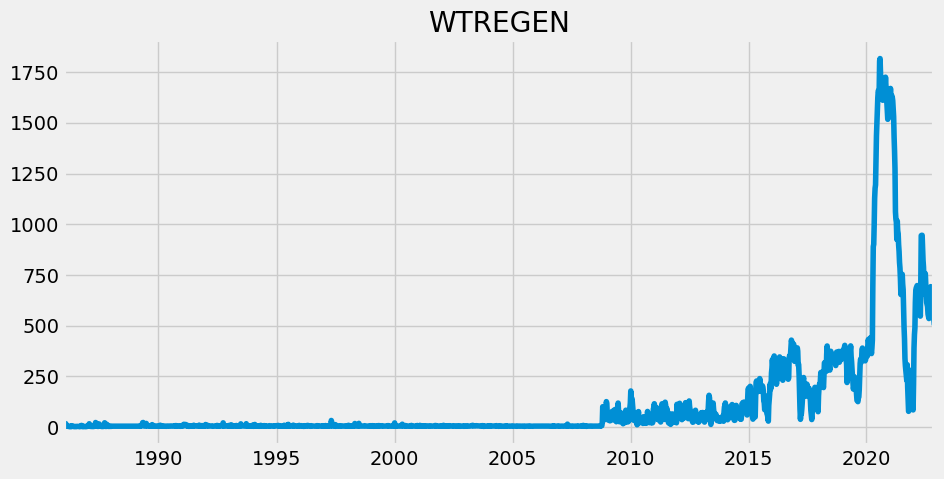

In [ ]:
liab_and_capt.plot(figsize=(10,5), title='WTREGEN')

In [ ]:
sp500[sp500.index >= '2020-01-01']

2020-01-01        NaN
2020-01-02    3257.85
2020-01-03    3234.85
2020-01-06    3246.28
2020-01-07    3237.18
               ...   
2022-11-16    3958.79
2022-11-17    3946.56
2022-11-18    3965.34
2022-11-21    3949.94
2022-11-22    4003.58
Length: 755, dtype: float64

In [ ]:
# sp500_df = sp500.reset_index().rename(columns={"index": "date", 0: "sp500"})
sp500_df = sp500[sp500.index >= '2020-01-01']
sp500_df

2020-01-01        NaN
2020-01-02    3257.85
2020-01-03    3234.85
2020-01-06    3246.28
2020-01-07    3237.18
               ...   
2022-11-16    3958.79
2022-11-17    3946.56
2022-11-18    3965.34
2022-11-21    3949.94
2022-11-22    4003.58
Length: 755, dtype: float64

<AxesSubplot:>

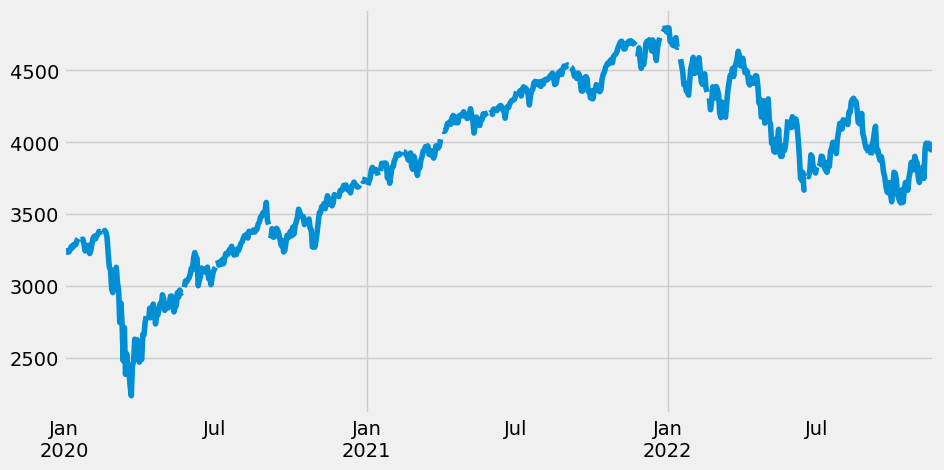

In [ ]:
sp500_df.plot(figsize=(10, 5), x='date', y='sp500')

In [ ]:
# liab_and_capt = liab_and_capt.reset_index().rename(columns={"index": "date", 0: "wtregen"})
liab_and_capt = fred.get_series('WTREGEN')
liab_and_capt = liab_and_capt[liab_and_capt.index >= '2020-01-01']
# liab_and_capt = liab_and_capt[liab_and_capt['date'] >= '2020-01-01'].reset_index(drop=True)
liab_and_capt

2020-01-01    382.553
2020-01-08    367.002
2020-01-15    350.987
2020-01-22    403.941
2020-01-29    432.061
               ...   
2022-10-19    607.199
2022-10-26    634.548
2022-11-02    598.544
2022-11-09    527.479
2022-11-16    502.982
Length: 151, dtype: float64

<AxesSubplot:>

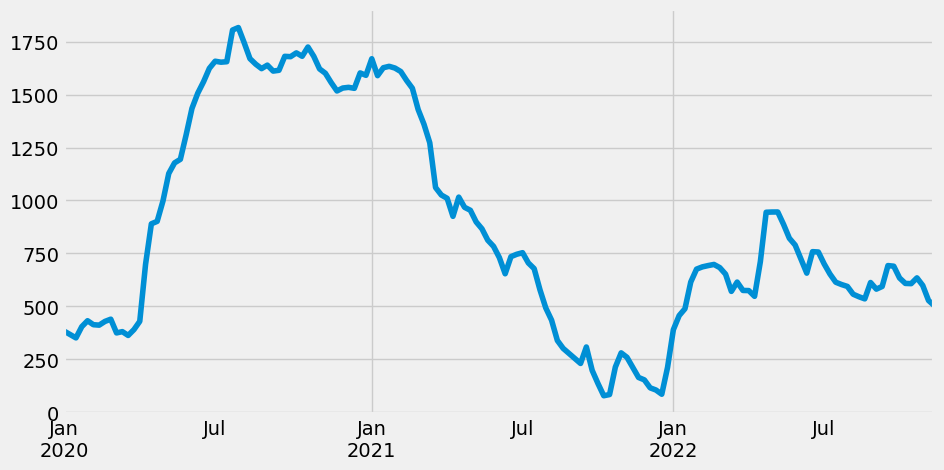

In [ ]:
liab_and_capt.plot(figsize=(10, 5), x='date', y='wtregen')

[<matplotlib.lines.Line2D>]

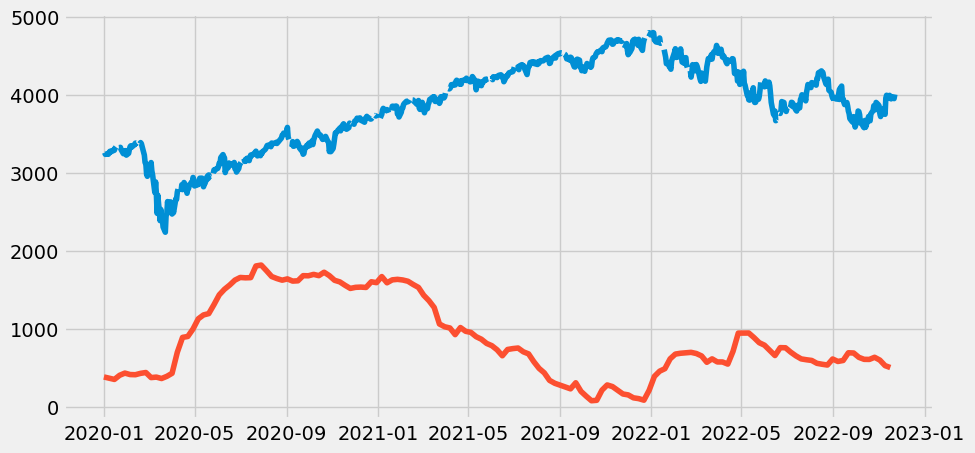

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,5))

# ax.plot(sp500_df['date'], sp500_df['sp500'])
# ax.plot(liab_and_capt['date'], liab_and_capt['wtregen'])

ax.plot(sp500_df.index, sp500_df)
ax.plot(liab_and_capt.index, liab_and_capt)

In [ ]:
feds_total_balance = fred.get_series('WALCL')

<AxesSubplot:title={'center':'Feds Total Balance'}>

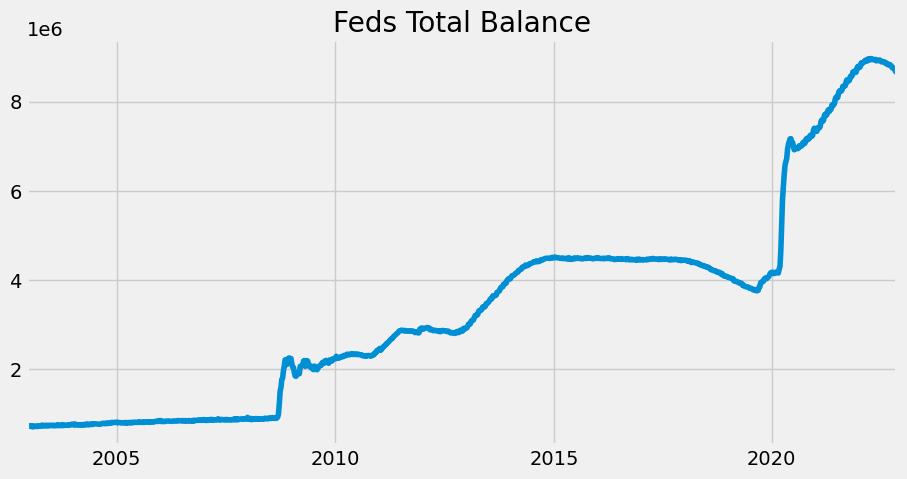

In [ ]:
feds_total_balance.plot(figsize=(10,5), title='Feds Total Balance')

In [ ]:
feds_total_balance = feds_total_balance[feds_total_balance.index >= '2020-01-01']

<AxesSubplot:title={'center':'Feds Total Balance'}>

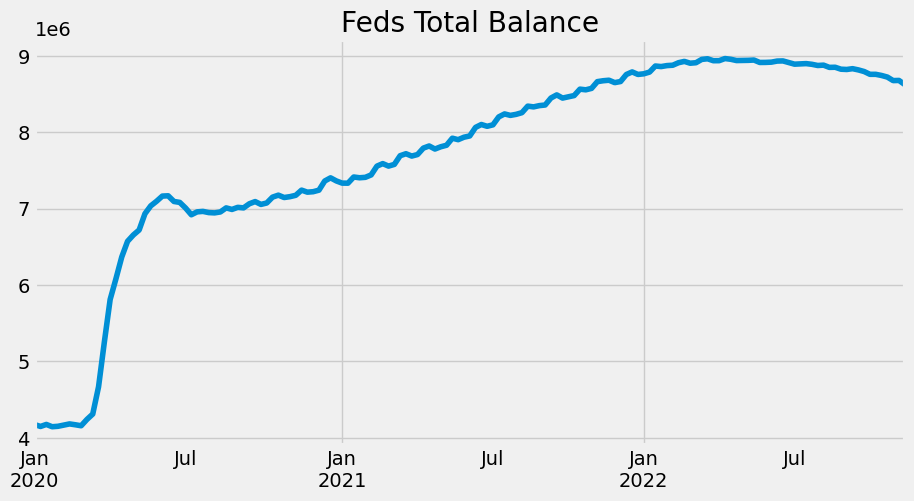

In [ ]:
feds_total_balance.plot(figsize=(10,5), title='Feds Total Balance')

In [ ]:
rrp = fred.get_series('RRPONTSYD')

<AxesSubplot:>

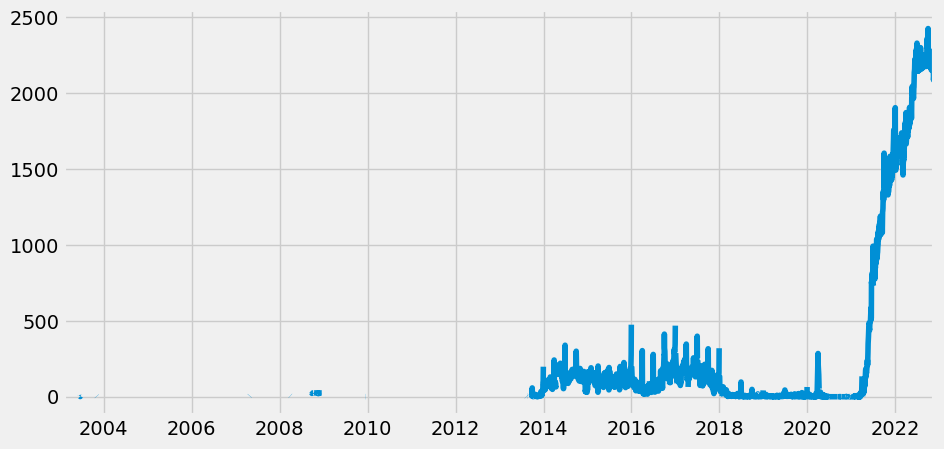

In [ ]:
rrp.plot(figsize=(10,5))

<AxesSubplot:>

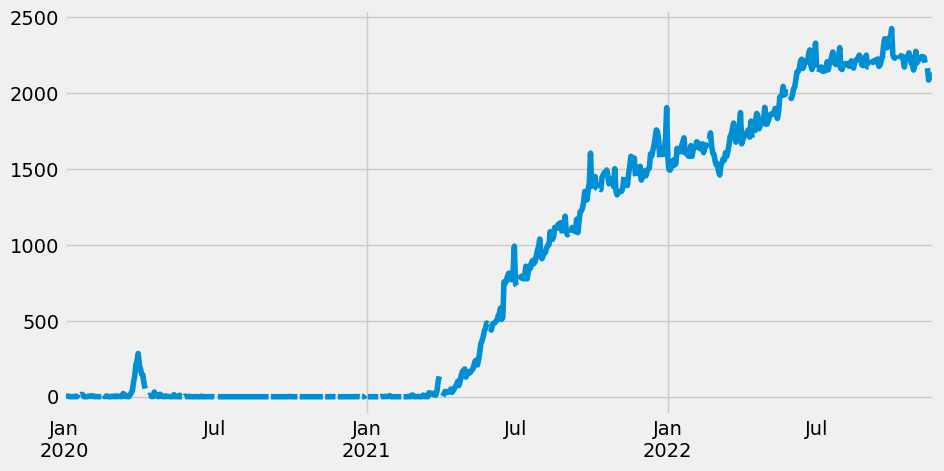

In [ ]:
rrp = rrp[rrp.index >= '2020-01-01']
rrp.plot(figsize=(10,5))

In [ ]:
# fig, ax = plt.subplots(1,1,figsize=(10,5))
# ax.plot(liab_and_capt.index, liab_and_capt)
# ax.plot(feds_total_balance.index, feds_total_balance)
# ax.plot(rrp.index, rrp)

In [ ]:
# notice the date gaps
liab_and_capt

2020-01-01    382.553
2020-01-08    367.002
2020-01-15    350.987
2020-01-22    403.941
2020-01-29    432.061
               ...   
2022-10-19    607.199
2022-10-26    634.548
2022-11-02    598.544
2022-11-09    527.479
2022-11-16    502.982
Length: 151, dtype: float64

In [ ]:
# fill in the date gaps using...
liab_and_capt = liab_and_capt.resample('1D').mean().ffill()

In [ ]:
feds_total_balance = feds_total_balance.resample('1D').mean().ffill()

In [ ]:
rrp = rrp.resample('1D').mean().ffill()

In [ ]:
feds_total_balance = feds_total_balance[feds_total_balance.index >= '2020-07-01'] / 1000.0
rrp = rrp[rrp.index >= '2020-07-01']
liab_and_capt = liab_and_capt[liab_and_capt.index >= '2020-07-01']

[<matplotlib.lines.Line2D>]

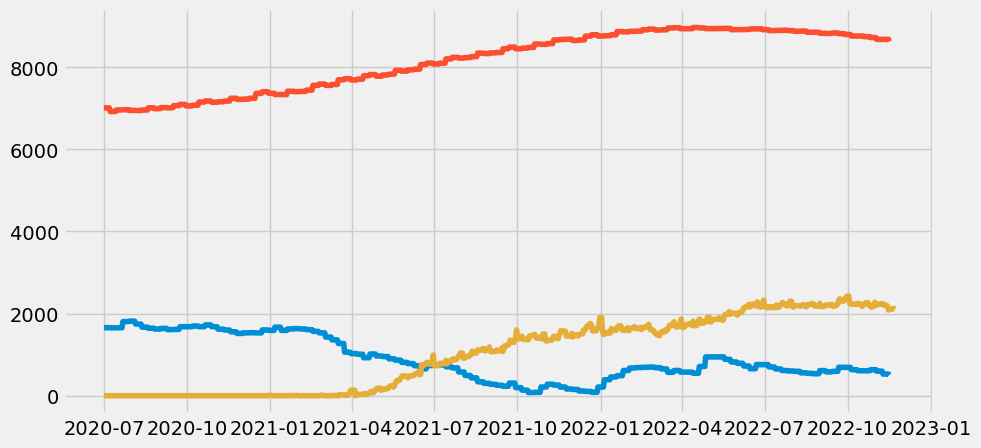

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(liab_and_capt.index, liab_and_capt)
ax.plot(feds_total_balance.index, feds_total_balance)
ax.plot(rrp.index, rrp)

In [ ]:
result = pd.concat([feds_total_balance, rrp, liab_and_capt], axis=1).rename(columns={0: "feds_total_balance", 1: "rrp", 2: "liab_and_capt"})
result

,feds_total_balance,rrp,liab_and_capt
2020-07-01,7009.04,0.002,1657.62
2020-07-02,7009.04,0.002,1657.62
2020-07-03,7009.04,0.002,1657.62
2020-07-04,7009.04,0.002,1657.62
2020-07-05,7009.04,0.002,1657.62
...,...,...,...
2022-11-18,NaN,2113.413,NaN
2022-11-19,NaN,2113.413,NaN
2022-11-20,NaN,2113.413,NaN
2022-11-21,NaN,2125.426,NaN


In [ ]:
result['rrp+liab_and_capt'] = result['rrp'] + result['liab_and_capt']
result

,feds_total_balance,rrp,liab_and_capt,rrp+liab_and_capt
2020-07-01,7009.04,0.002,1657.62,1657.622
2020-07-02,7009.04,0.002,1657.62,1657.622
2020-07-03,7009.04,0.002,1657.62,1657.622
2020-07-04,7009.04,0.002,1657.62,1657.622
2020-07-05,7009.04,0.002,1657.62,1657.622
...,...,...,...,...
2022-11-18,NaN,2113.413,NaN,NaN
2022-11-19,NaN,2113.413,NaN,NaN
2022-11-20,NaN,2113.413,NaN,NaN
2022-11-21,NaN,2125.426,NaN,NaN


In [ ]:
result['net_liquidity'] = result['feds_total_balance'] - result['rrp+liab_and_capt']
result

,feds_total_balance,rrp,liab_and_capt,rrp+liab_and_capt,net_liquidity
2020-07-01,7009.04,0.002,1657.62,1657.622,5351.418
2020-07-02,7009.04,0.002,1657.62,1657.622,5351.418
2020-07-03,7009.04,0.002,1657.62,1657.622,5351.418
2020-07-04,7009.04,0.002,1657.62,1657.622,5351.418
2020-07-05,7009.04,0.002,1657.62,1657.622,5351.418
...,...,...,...,...,...
2022-11-18,NaN,2113.413,NaN,NaN,NaN
2022-11-19,NaN,2113.413,NaN,NaN,NaN
2022-11-20,NaN,2113.413,NaN,NaN,NaN
2022-11-21,NaN,2125.426,NaN,NaN,NaN


In [ ]:
# sanity check: https://medium.com/@Liscivia/how-net-liquidity-is-driving-the-equity-markets-23d9b4e2eb40
result[result.index == '2022-10-10']

,feds_total_balance,rrp,liab_and_capt,rrp+liab_and_capt,net_liquidity
2022-10-10,8759.053,2226.95,633.939,2860.889,5898.164


In [ ]:
result = pd.concat([result, sp500], axis=1).rename(columns={0: "sp500"})
result

,feds_total_balance,rrp,liab_and_capt,rrp+liab_and_capt,net_liquidity,sp500
2012-11-23,NaN,NaN,NaN,NaN,NaN,1409.15
2012-11-26,NaN,NaN,NaN,NaN,NaN,1406.29
2012-11-27,NaN,NaN,NaN,NaN,NaN,1398.94
2012-11-28,NaN,NaN,NaN,NaN,NaN,1409.93
2012-11-29,NaN,NaN,NaN,NaN,NaN,1415.95
...,...,...,...,...,...,...
2022-11-18,NaN,2113.413,NaN,NaN,NaN,3965.34
2022-11-19,NaN,2113.413,NaN,NaN,NaN,NaN
2022-11-20,NaN,2113.413,NaN,NaN,NaN,NaN
2022-11-21,NaN,2125.426,NaN,NaN,NaN,3949.94


In [ ]:
result['sp500_shift_2weeks'] = result['sp500'].shift(periods=-14)
result['sp500_shift_1week'] = result['sp500'].shift(periods=-7)

In [ ]:
result

,feds_total_balance,rrp,liab_and_capt,rrp+liab_and_capt,net_liquidity,sp500,sp500_shift_2weeks,sp500_shift_1week
2012-11-23,NaN,NaN,NaN,NaN,NaN,1409.15,1419.45,1407.05
2012-11-26,NaN,NaN,NaN,NaN,NaN,1406.29,1413.58,1409.28
2012-11-27,NaN,NaN,NaN,NaN,NaN,1398.94,1430.36,1413.94
2012-11-28,NaN,NaN,NaN,NaN,NaN,1409.93,1446.79,1418.07
2012-11-29,NaN,NaN,NaN,NaN,NaN,1415.95,1435.81,1418.55
...,...,...,...,...,...,...,...,...
2022-11-18,NaN,2113.413,NaN,NaN,NaN,3965.34,NaN,NaN
2022-11-19,NaN,2113.413,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-20,NaN,2113.413,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-21,NaN,2125.426,NaN,NaN,NaN,3949.94,NaN,NaN


In [ ]:
result['net_liquidity'].corr(result['sp500'])

0.9398541326257942

In [ ]:
result['net_liquidity'].corr(result['sp500_shift_1week'])

0.9443071644430759

In [ ]:
result['net_liquidity'].corr(result['sp500_shift_2weeks'])

0.9445410517149411

In [ ]:
result.to_csv('data/output.csv', index=False)

In [ ]:
result[result.index >= '2020-07-01']

,feds_total_balance,rrp,liab_and_capt,rrp+liab_and_capt,net_liquidity,sp500,sp500_shift_2weeks,sp500_shift_1week
2020-07-01,7009.04,0.002,1657.62,1657.622,5351.418,3115.86,3226.56,3169.94
2020-07-02,7009.04,0.002,1657.62,1657.622,5351.418,3130.01,3215.57,3152.05
2020-07-03,7009.04,0.002,1657.62,1657.622,5351.418,NaN,3224.73,3185.04
2020-07-04,7009.04,0.002,1657.62,1657.622,5351.418,NaN,NaN,NaN
2020-07-05,7009.04,0.002,1657.62,1657.622,5351.418,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-11-18,NaN,2113.413,NaN,NaN,NaN,3965.34,NaN,NaN
2022-11-19,NaN,2113.413,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-20,NaN,2113.413,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-21,NaN,2125.426,NaN,NaN,NaN,3949.94,NaN,NaN


In [ ]:
### queries are much better 
# result.query('index >= "2020-07-01"')

,feds_total_balance,rrp,liab_and_capt,rrp+liab_and_capt,net_liquidity,sp500,sp500_shift_2weeks,sp500_shift_1week
2020-07-01,7009.04,0.002,1657.62,1657.622,5351.418,3115.86,3226.56,3169.94
2020-07-02,7009.04,0.002,1657.62,1657.622,5351.418,3130.01,3215.57,3152.05
2020-07-03,7009.04,0.002,1657.62,1657.622,5351.418,NaN,3224.73,3185.04
2020-07-04,7009.04,0.002,1657.62,1657.622,5351.418,NaN,NaN,NaN
2020-07-05,7009.04,0.002,1657.62,1657.622,5351.418,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-11-18,NaN,2113.413,NaN,NaN,NaN,3965.34,NaN,NaN
2022-11-19,NaN,2113.413,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-20,NaN,2113.413,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-21,NaN,2125.426,NaN,NaN,NaN,3949.94,NaN,NaN


[<matplotlib.lines.Line2D>]

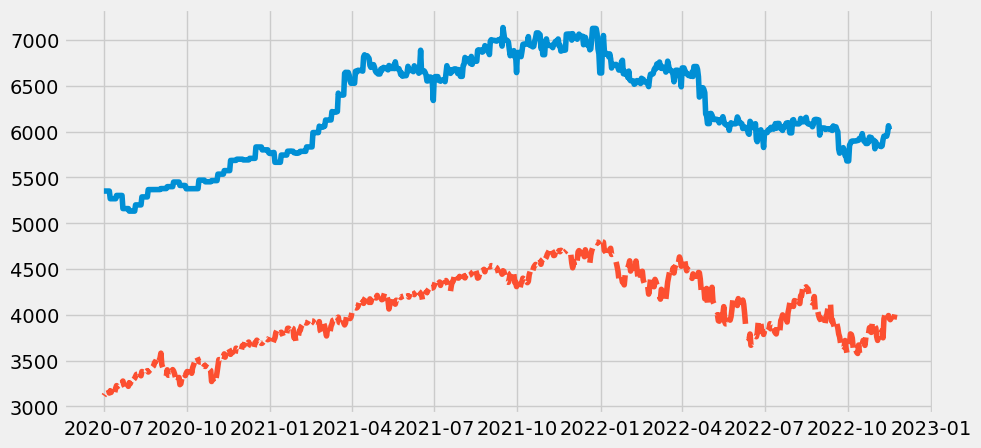

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(result.query('index >= "2020-07-01"').index, result.query('index >= "2020-07-01"')['net_liquidity'])
ax.plot(result.query('index >= "2020-07-01"').index, result.query('index >= "2020-07-01"')['sp500'])
# ax.plot(result.index, result['rrp'])
# ax.plot(result.index, result['liab_and_capt'])

In [ ]:
sticky_cpi = fred.get_series('CORESTICKM159SFRBATL')

<AxesSubplot:>

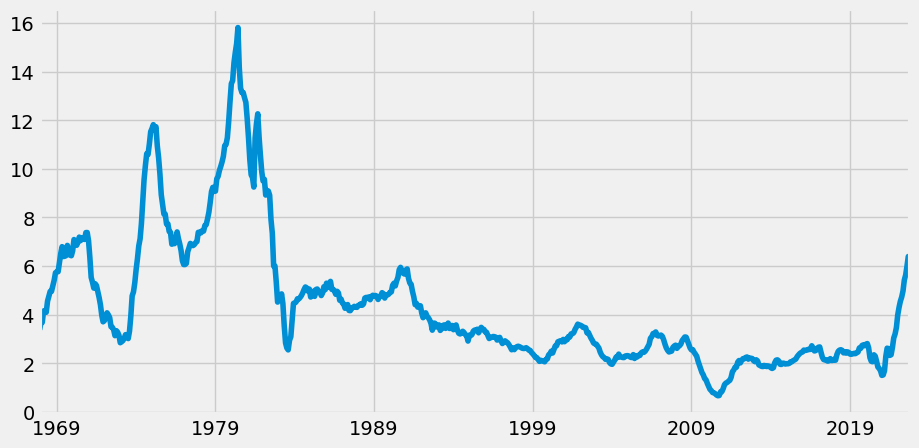

In [ ]:
sticky_cpi.plot(figsize=(10,5))

In [ ]:
fred.search?

Signature: fred.search(text, limit=1000, order_by=None, sort_order=None, filter=None)
Docstring:
Do a fulltext search for series in the Fred dataset. Returns information about matching series in a DataFrame.

Parameters
----------
text : str
    text to do fulltext search on, e.g., 'Real GDP'
limit : int, optional
    limit the number of results to this value. If limit is 0, it means fetching all results without limit.
order_by : str, optional
    order the results by a criterion. Valid options are 'search_rank', 'series_id', 'title', 'units', 'frequency',
    'seasonal_adjustment', 'realtime_start', 'realtime_end', 'last_updated', 'observation_start', 'observation_end',
    'popularity'
sort_order : str, optional
    sort the results by ascending or descending order. Valid options are 'asc' or 'desc'
filter : tuple, optional
    filters the results. Expects a tuple like (filter_variable, filter_value).
    Valid filter_variable values are 'frequency', 'units', and 'seasonal_adjustment

In [ ]:
fred.search('federal funds rate', order_by='popularity')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
FEDFUNDS,FEDFUNDS,2022-11-22,2022-11-22,Federal Funds Effective Rate,1954-07-01,2022-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-11-01 15:18:02-05:00,97,Averages of daily figures. For additional hi...
M2SL,M2SL,2022-11-22,2022-11-22,M2,1959-01-01,2022-10-01,Monthly,M,Billions of Dollars,Bil. of $,Seasonally Adjusted,SA,2022-11-22 12:02:15-06:00,91,"Before May 2020, M2 consists of M1 plus (1) sa..."
DFF,DFF,2022-11-22,2022-11-22,Federal Funds Effective Rate,1954-07-01,2022-11-21,"Daily, 7-Day",D,Percent,%,Not Seasonally Adjusted,NSA,2022-11-22 15:26:03-06:00,86,For additional historical federal funds rate d...
M2V,M2V,2022-11-22,2022-11-22,Velocity of M2 Money Stock,1959-01-01,2022-07-01,Quarterly,Q,Ratio,Ratio,Seasonally Adjusted,SA,2022-10-27 07:58:02-05:00,84,Calculated as the ratio of quarterly nominal G...
DFEDTARU,DFEDTARU,2022-11-22,2022-11-22,Federal Funds Target Range - Upper Limit,2008-12-16,2022-11-22,"Daily, 7-Day",D,Percent,%,Not Seasonally Adjusted,NSA,2022-11-22 07:01:05-06:00,80,This series represents upper limit of the fede...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BOGZ1FA662151003A,BOGZ1FA662151003A,2022-11-22,2022-11-22,Security Brokers and Dealers; Security Repurch...,1946-01-01,2021-01-01,Annual,A,Millions of Dollars,Mil. of $,Seasonally Adjusted Annual Rate,SAAR,2022-06-09 11:54:10-05:00,1,Source ID: FA662151003.A For more information...
H0MMFINM,H0MMFINM,2022-11-22,2022-11-22,M3 Institutional Money Funds (DISCONTINUED),1959-01-01,2006-02-01,Monthly,M,Billions of Dollars,Bil. of $,Seasonally Adjusted,SA,2022-02-07 13:45:09-06:00,1,"On March 23, 2006, the Board of Governors of t..."
BOGZ1FA145000905Q,BOGZ1FA145000905Q,2022-11-22,2022-11-22,Nonfinancial Business; Net Lending (+) or Borr...,1946-10-01,2022-04-01,Quarterly,Q,Millions of Dollars,Mil. of $,Seasonally Adjusted Annual Rate,SAAR,2022-09-13 18:06:04-05:00,1,Source ID: FA145000905.Q For more information...


In [ ]:
fed_funds = fred.get_series('FEDFUNDS')

<AxesSubplot:>

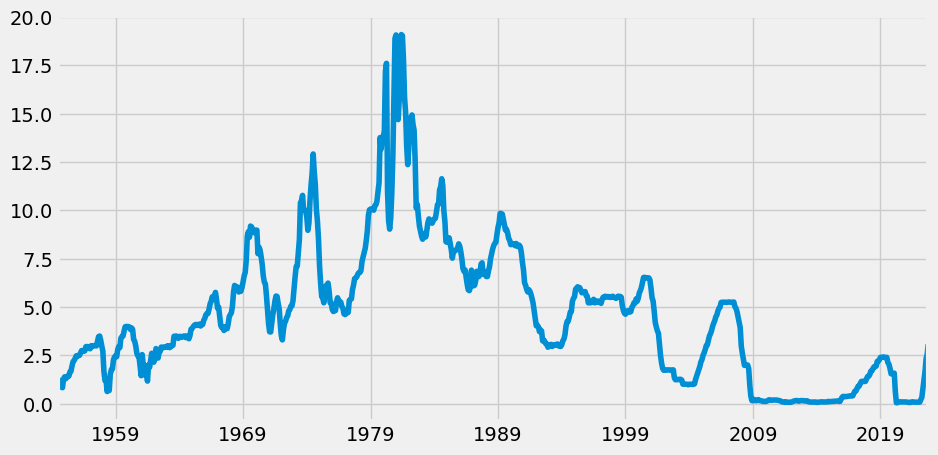

In [ ]:
fed_funds.plot(figsize=(10,5))

<AxesSubplot:>

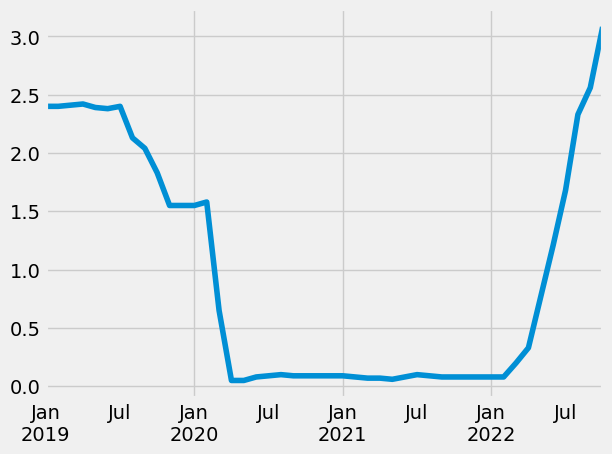

In [ ]:
fed_funds[fed_funds.index >= '2019-01-01'].plot()

In [ ]:
# 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity

<AxesSubplot:>

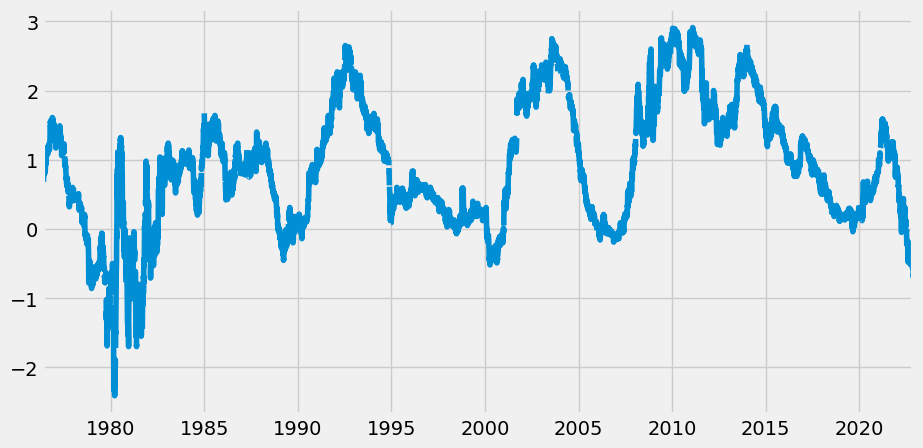

In [ ]:
t10y2y = fred.get_series('T10Y2Y')
t10y2y.plot(figsize=(10,5))

<AxesSubplot:>

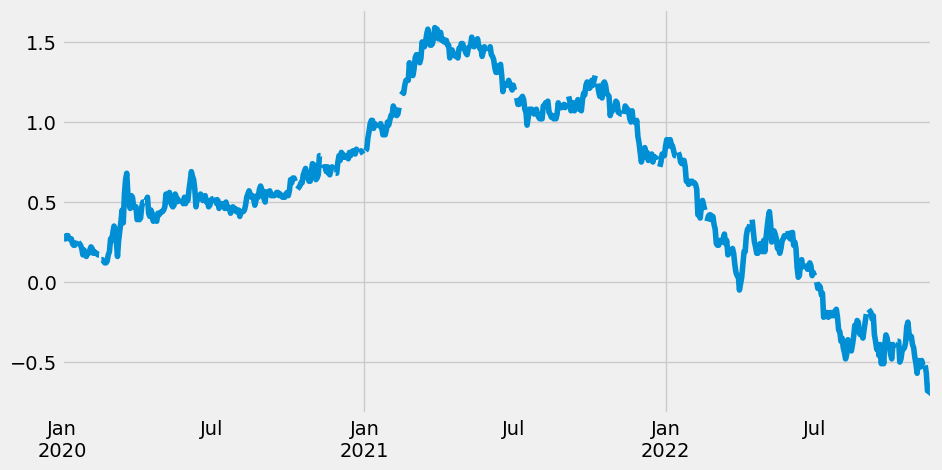

In [ ]:
t10y2y = t10y2y[t10y2y.index >= '2020-01-01']
t10y2y.plot(figsize=(10,5))

<AxesSubplot:>

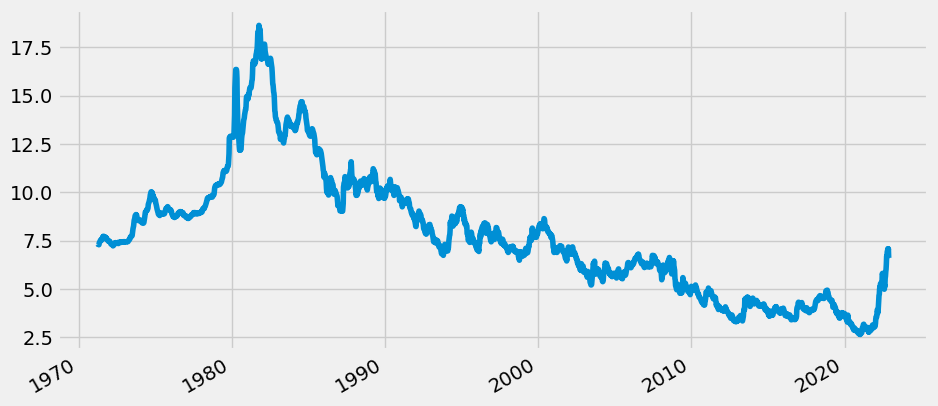

In [ ]:
mortgage_30us = fred.get_series('MORTGAGE30US')
mortgage_30us.plot(figsize=(10,5))

<AxesSubplot:>

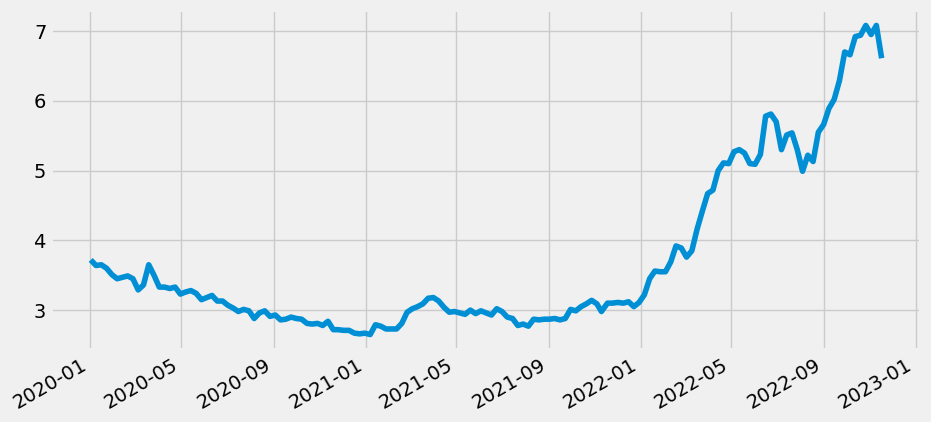

In [ ]:
mortgage_30us[mortgage_30us.index >= '2020-01-01'].plot(figsize=(10,5))